# Memoization recipe

1. Make it work
- Visualize the problem as tree
- implement the tree using recursion
- test it

2. Make it efficient
- add a memo object
- add a base case to return memo values
- store return values into the memo

# 1. Nth no. of fibonacci sequence

In [27]:
def fibo(n, memo={}):
    if n <= 2: return 1
    if n in memo: return memo[n]
    memo[n] = fibo(n-1) + fibo(n-2)
    return memo[n]

print(fibo(3, {}))

2


# 2. Grid traveler problem

### Say that you are a traveler on a 2d grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right. In how many ways you can travel to the goal on a grid with dimensions m*n

In [26]:
def gridTraveler(m,n, memo={}):
    key = (m,n)
    if key in memo: return memo[key]
    if m == 0 or n == 0: return 0
    if m == 1 and n == 1: return 1
    memo[key] = gridTraveler(m-1, n) + gridTraveler(m,n-1)
    return memo[key]

gridTraveler(2,3, {})

3

# 3. canSum
### Write a function canSum(targetSum, numbers) that takes in a targetSum and an array of numbers as arguements.
### The function should return a boolean indicating whether or not it is possible to generate the targetSum using numbers from the array.
### You may use an element of the array as many times as needed.
### You may assume that all input numbers are positive.

In [25]:
def canSum(targetSum, numbers, memo={}):
    
    if targetSum in memo: return memo[targetSum]
    if targetSum == 0: return True
    if targetSum < 0: return False
    
    for number in numbers:
        remainder = targetSum - number
        if canSum(remainder, numbers):
            memo[targetSum] = True
            return True
    
    memo[targetSum] = False
    return False

print(canSum(7, [5,3,4,7], {}))
print(canSum(300, [7,14], {}))

True
False


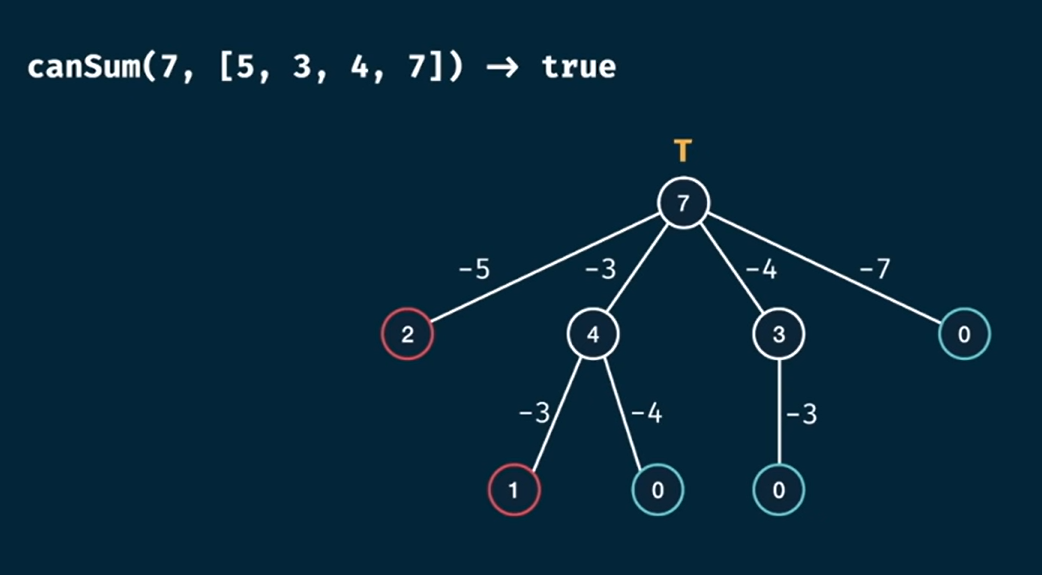

# 4. howSum

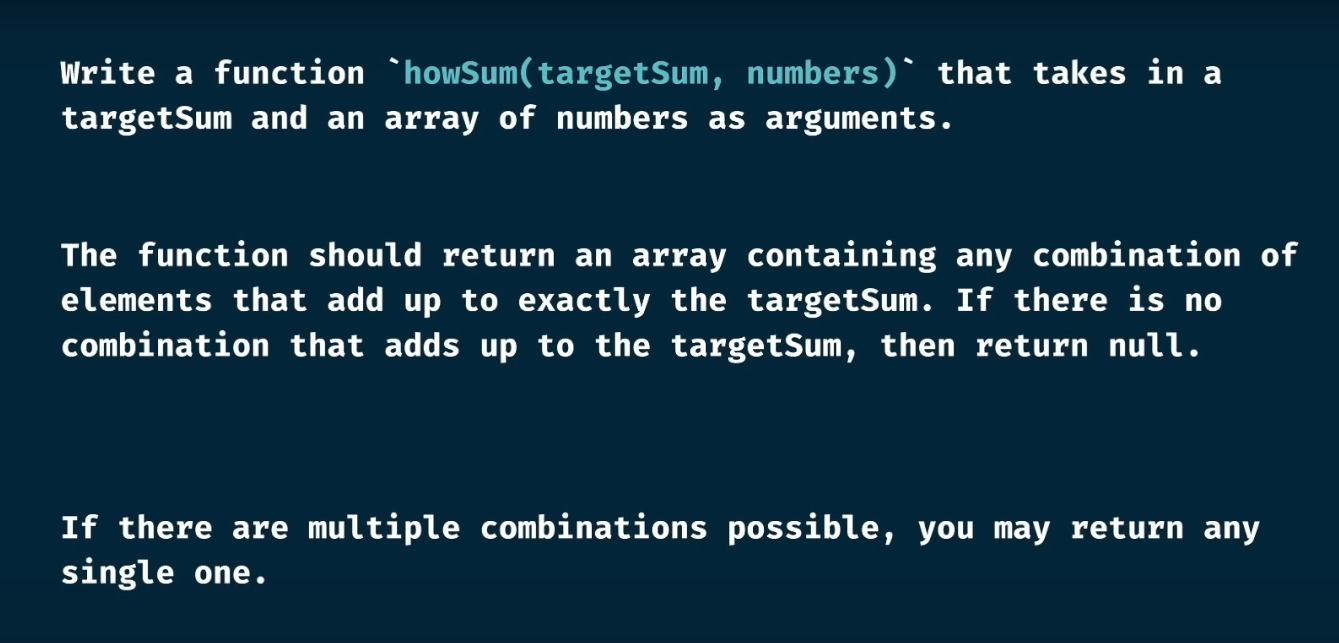

In [23]:
def howSum(targetSum, numbers, memo={}):
    if targetSum in memo: return memo[targetSum]
    if targetSum == 0: return []
    if targetSum < 0: return None
        
    for number in numbers:
        remainder = targetSum - number
        remainder_result = howSum(remainder, numbers)
        if remainder_result != None: 
            remainder_result = remainder_result + [number]
            memo[targetSum] = remainder_result
            return remainder_result
        
    memo[targetSum] = None
    return None


print(howSum(7, [5,3,4,7], {}))
print(howSum(10, [5,3,4,7], {}))
print(howSum(300, [7,14], {}))

[4, 3]
[5, 5]
None


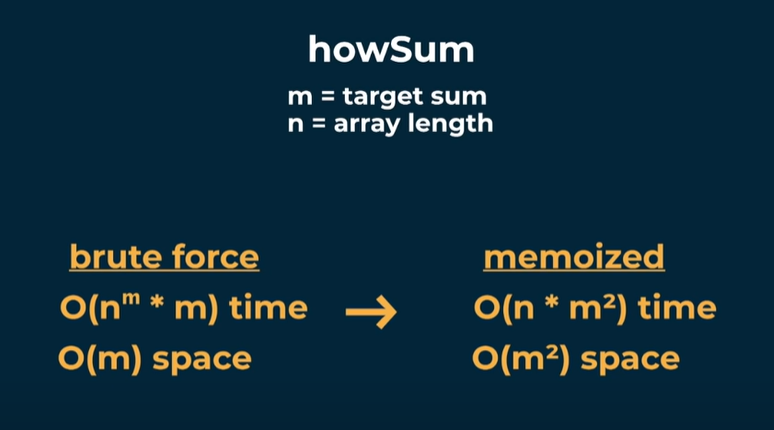

# 5. bestSum

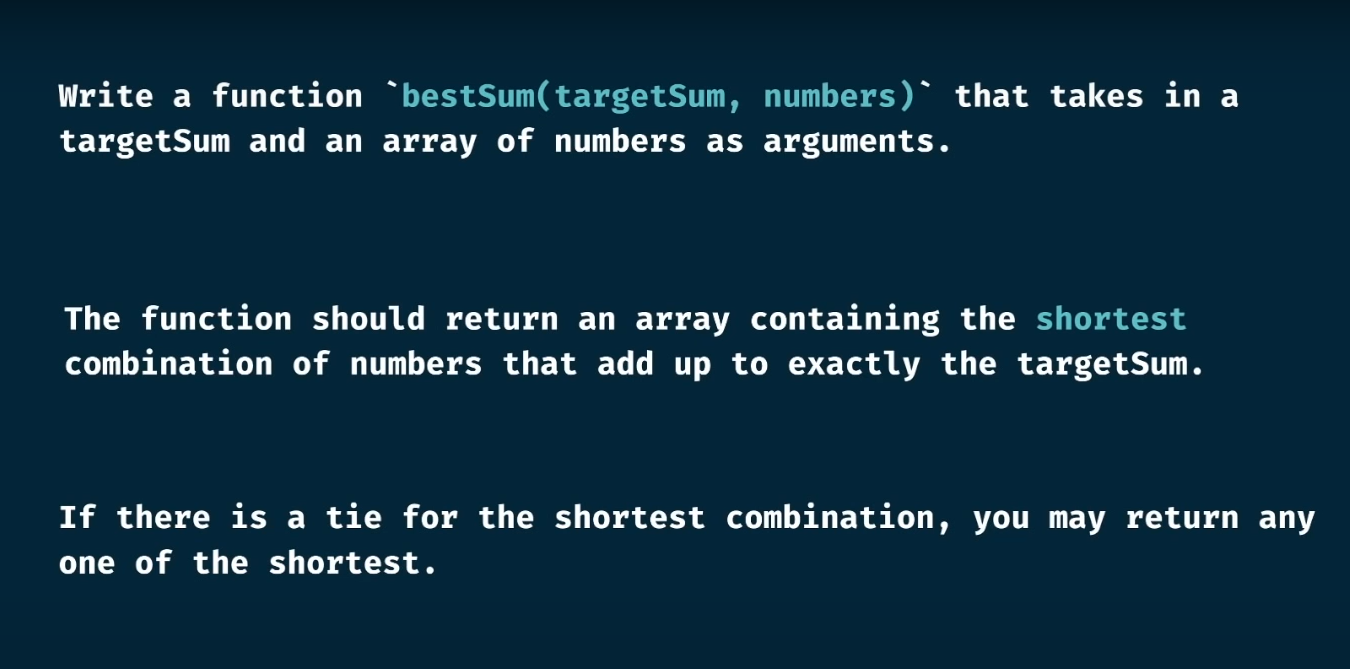

In [80]:
def bestSum(targetSum, numbers, memo={}):
    if targetSum in memo: return memo[targetSum]
    if targetSum == 0: return []
    if targetSum < 0: return None
    
    shortest_combination = None
    
    for num in numbers:
        
        remainder = targetSum - num
        remainder_combination = bestSum(remainder, numbers, memo)
        
        if remainder_combination != None:
            remainder_combination = [num] + remainder_combination      
            if shortest_combination == None or len(remainder_combination) < len(shortest_combination):
                shortest_combination = remainder_combination
                
    memo[targetSum] = shortest_combination
    return shortest_combination

print(bestSum(7, [5,3,4,7], {}))
print(bestSum(8, [2,3,5], {}))
print(bestSum(8, [1,4,5], {}))
print(bestSum(100, [1,2,5,25], {}))

[7]
[3, 5]
[4, 4]
[25, 25, 25, 25]


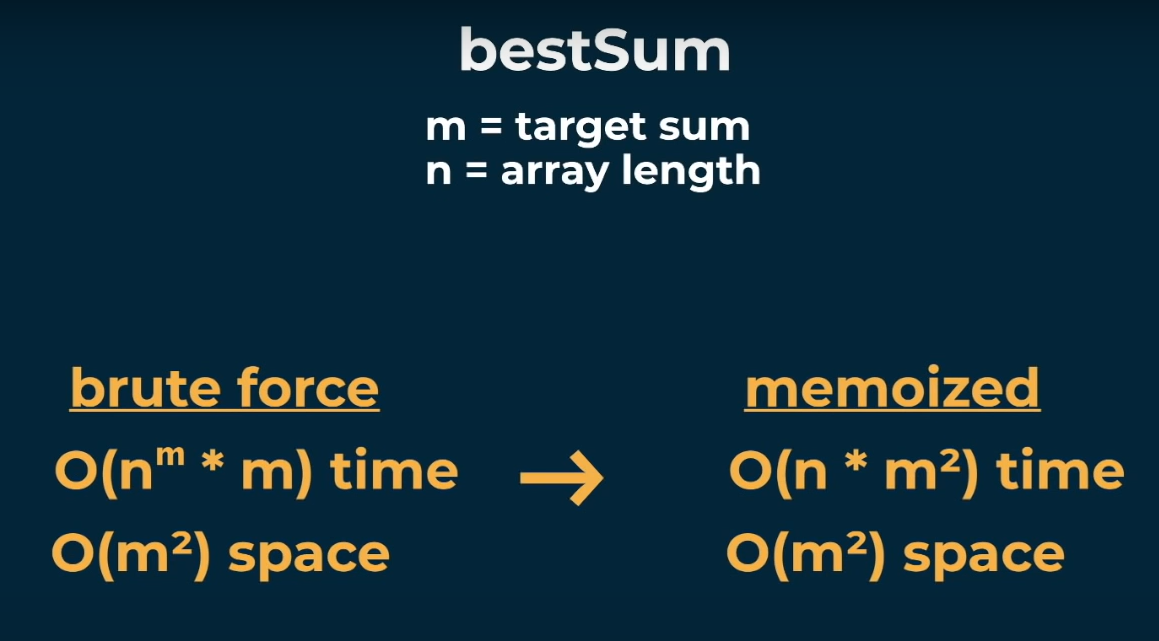

# 6. canConstruct

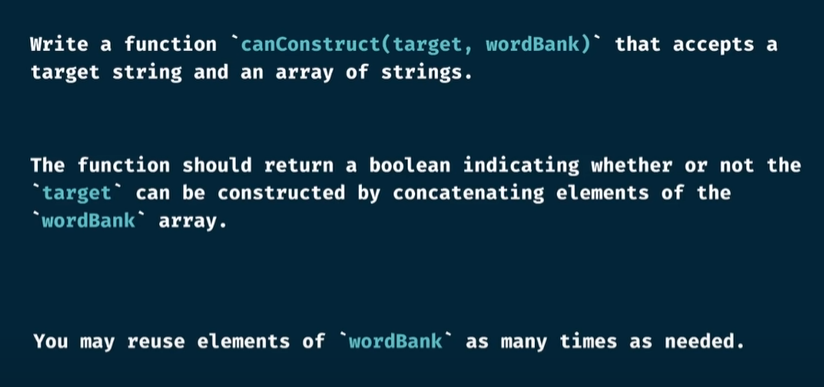

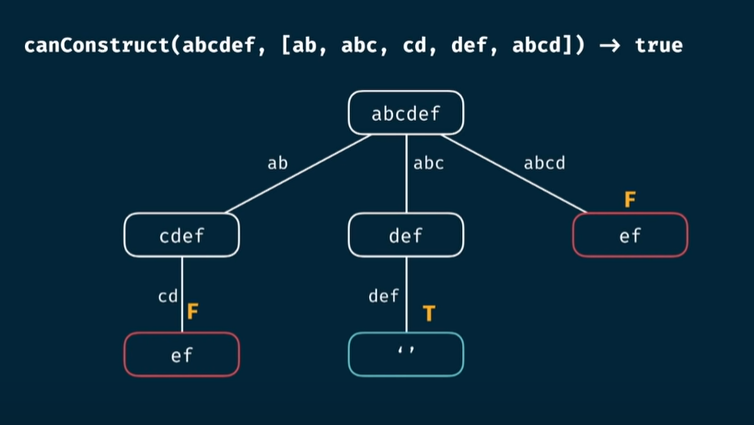

In [1]:
def canConstruct(target, wordBank, memo={}):
    
    if target in memo: return memo[target]
    if target == '': return True
    
    for word in wordBank:
        
        if target.startswith(word):
            suffix = target[len(word):]
            if canConstruct(suffix, wordBank):
                memo[target] = True
                return True
            
    memo[target] = False
    return False
    
print(canConstruct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd'], {}))
print(canConstruct('skateboard', ['bo', 'rd', 'ate', 't', 'ska', 'sk', 'boar'], {}))
print(canConstruct('enterapotentpot', ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'], {}))
print(canConstruct('eeeeeeeeeeeeeeeeeeeeeeef', ['e', 'ee', 'eee', 'eeeee', 'eeeeeeee'], {}))

True
False
True
False


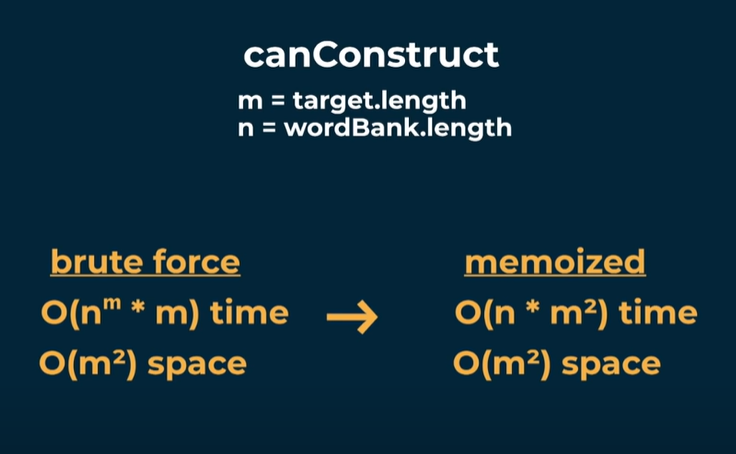

# 7. countConstruct

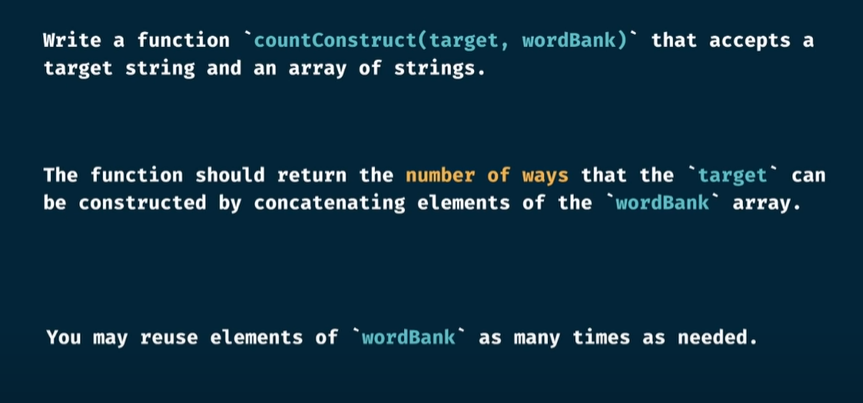

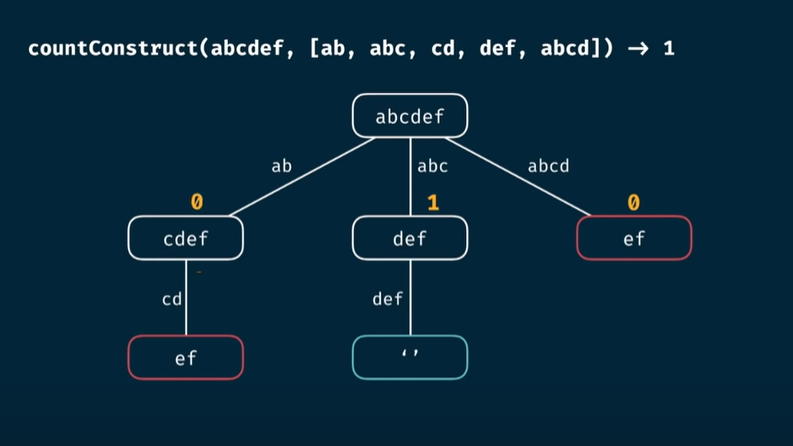

In [1]:
def countConstruct(target, wordBank, memo={}):
    
    if target in memo: return memo[target]
    if target == '': return 1
    
    no_of_ways = 0
    
    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            no_of_ways += countConstruct(suffix, wordBank)
    
    memo[target] = no_of_ways
    return no_of_ways


print(countConstruct('purple', ['purp', 'p', 'ur', 'le', 'purpl'], {}))
print(countConstruct('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd'], {}))
print(countConstruct('skateboard', ['bo', 'rd', 'ate', 't', 'ska', 'sk', 'boar'], {}))
print(countConstruct('enterapotentpot', ['a', 'p', 'ent', 'enter', 'ot', 'o', 't'], {}))
print(countConstruct('eeeeeeeeeeeeeeeeeeeeeeef', ['e', 'ee', 'eee', 'eeeee', 'eeeeeeee'], {}))

2
1
0
4
0


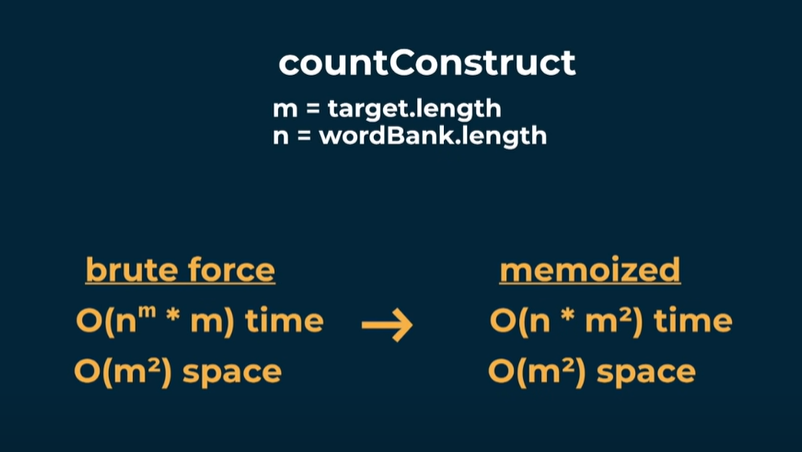

# 8. allConstruct

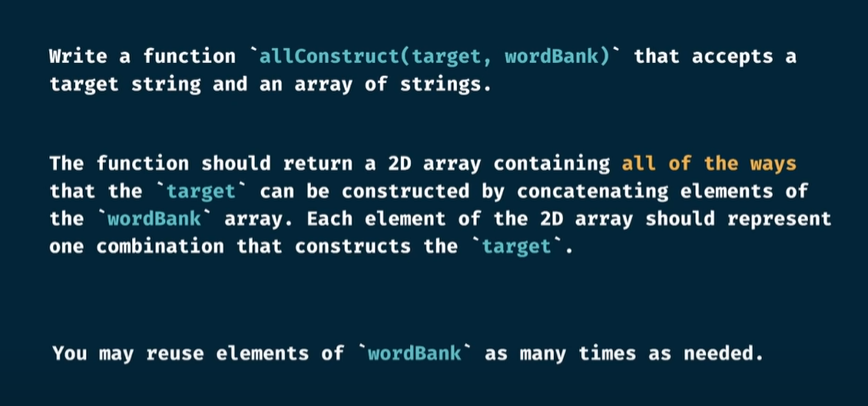

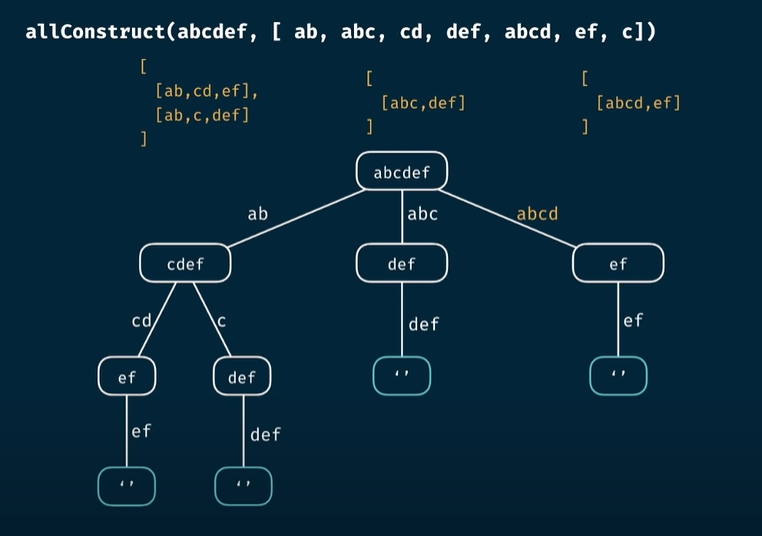

In [78]:
def allConstruct(target, wordBank):
    
    if target == '': return [[]]
    result = []
    for word in wordBank:
        
        if target.startswith(word):
            suffix = target[len(word):]
            suffix_ways = allConstruct(suffix, wordBank)
            target_ways = list(map(lambda x:[word] + x, suffix_ways))
            result = result + target_ways
    return result

print(allConstruct('purple', ['purp', 'p', 'ur', 'le', 'purpl']))            

[['purp', 'le'], ['p', 'ur', 'p', 'le']]
